<a href="https://colab.research.google.com/github/acvats/NLP---dataset-balacing/blob/master/NLP_dataset_balacing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/arbazkhan971/analyticvidhyadatasetsentiment/metadata

In this we tried to balance an unbalanced NLP dataset using various techniques 

In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/.kaggle"

In [2]:
!pip install kaggle

In [3]:
!mkdir .kaggle

In [4]:
cp '/content/drive/My Drive/kaggle auth key/kaggle.json' '/content/.kaggle/kaggle.json'

In [5]:
!chmod 600 /content/.kaggle/kaggle.json

In [6]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [7]:
!kaggle datasets list

ref                                                    title                                              size  lastUpdated          downloadCount  
-----------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
anmolkumar/health-insurance-cross-sell-prediction      Health Insurance Cross Sell Prediction 🏠 🏥          6MB  2020-09-11 18:39:31            406  
shivan118/healthcare-analytics                         Healthcare Analytics                                2MB  2020-09-13 17:40:05            269  
Cornell-University/arxiv                               arXiv Dataset                                     885MB  2020-09-14 16:54:47           2798  
nipunarora8/age-gender-and-ethnicity-face-data-csv     AGE, GENDER AND ETHNICITY (FACE DATA) CSV          63MB  2020-09-02 13:46:38            176  
datatattle/covid-19-nlp-text-classification            Coronavirus tweets NLP - Text Classification       

In [8]:
!kaggle datasets download -d 'arbazkhan971/analyticvidhyadatasetsentiment'

 74% 5.00M/6.72M [00:00<00:00, 12.9MB/s]
100% 6.72M/6.72M [00:00<00:00, 16.9MB/s]


In [9]:
cd {/content}/datasets/

/content/{/content}/datasets


In [10]:
cd arbazkhan971/analyticvidhyadatasetsentiment

/content/{/content}/datasets/arbazkhan971/analyticvidhyadatasetsentiment


In [11]:
ls

analyticvidhyadatasetsentiment.zip


In [12]:
!unzip analyticvidhyadatasetsentiment.zip -d data

Archive:  analyticvidhyadatasetsentiment.zip
  inflating: data/sample_submission_i5xnIZD-1.csv  
  inflating: data/test_tOlRoBf.csv   
  inflating: data/train_F3WbcTw.csv  


In [13]:
cd data

/content/{/content}/datasets/arbazkhan971/analyticvidhyadatasetsentiment/data


In [14]:
ls

sample_submission_i5xnIZD-1.csv  test_tOlRoBf.csv  train_F3WbcTw.csv


In [15]:
import pandas as pd
import numpy as np

In [16]:
train = pd.read_csv("train_F3WbcTw.csv")
test = pd.read_csv("test_tOlRoBf.csv")
sample_data = pd.read_csv("sample_submission_i5xnIZD-1.csv")

In [17]:
print(train.isnull().values.sum())

0


In [18]:
train.head()

,unique_hash,text,drug,sentiment
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1


In [20]:
y = train['sentiment']
y

0       2
1       2
2       2
3       2
4       1
       ..
5274    0
5275    2
5276    2
5277    2
5278    0
Name: sentiment, Length: 5279, dtype: int64

In [21]:
X= train.drop('sentiment', axis=1)
X

,unique_hash,text,drug
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya
...,...,...,...
5274,5b5d129f3bab30fbb4740540a16856907657f005,"Hi Bee, Thanks for the update and the good new...",alimta
5275,1aa7dde5dc5249ebc3490c1fbac6ca6df48753a2,Have you had blood testing done to check your ...,entyvio
5276,e9159c3f836f453f5f133008d40b7e65f9e70a42,All the best to your husband and family.,opdivo
5277,63d57717bd0cf650f91a5137bd1b427ba922edea,"Hi bazza, luckily my eyes aren't so badly affe...",lucentis


In [22]:
print(X.shape)
print(y.shape)

(5279, 3)
(5279,)


In [51]:
type(y)

pandas.core.series.Series

In [23]:
sentiment_count = train.sentiment.value_counts()
print('Class 0:', sentiment_count[0])
print('Class 1:', sentiment_count[1])
print('Class 2:', sentiment_count[2])

Class 0: 617
Class 1: 837
Class 2: 3825


Text(0, 0.5, 'Number of Review')

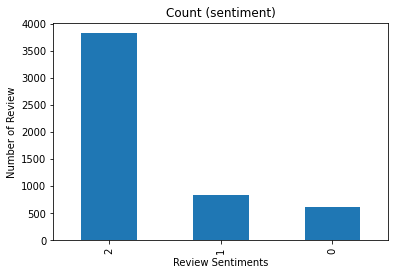

In [24]:
import matplotlib.pyplot as plt

sentiment_count.plot(kind='bar', title='Count (sentiment)');
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')

In [25]:
#a is 0, b is 1, c is 2
a = train[train['sentiment']==0]
b = train[train['sentiment']==1]
c = train[train['sentiment']==2]
print(a.shape,b.shape,c.shape)

(617, 4) (837, 4) (3825, 4)


In [40]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros,y_ros = ros.fit_sample(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [50]:
type(y_ros)

numpy.ndarray

In [41]:
print(X.shape,y.shape,X_ros.shape,y_ros.shape)

(5279, 3) (5279,) (11475, 3) (11475,)


In [42]:
from collections import Counter


print('Original dataset Shape {}'.format(Counter(y)))
print('Resampled dataset Shape {}'.format(Counter(y_ros)))

Original dataset Shape Counter({2: 3825, 1: 837, 0: 617})
Resampled dataset Shape Counter({2: 3825, 1: 3825, 0: 3825})


In [52]:
y_ros_df = pd.DataFrame({'sentiment': y_ros})
y_ros_df.head

<bound method NDFrame.head of        sentiment
0              2
1              2
2              2
3              2
4              1
...          ...
11470          1
11471          1
11472          1
11473          1
11474          1

[11475 rows x 1 columns]>

Class 0: 3825
Class 1: 3825
Class 2: 3825


Text(0, 0.5, 'Number of Review')

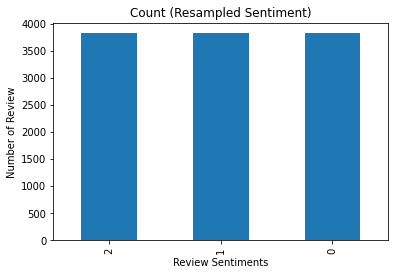

In [49]:
resampled_sentiment_count = y_ros_df.sentiment.value_counts()
print('Class 0:', resampled_sentiment_count[0])
print('Class 1:', resampled_sentiment_count[1])
print('Class 2:', resampled_sentiment_count[2])
resampled_sentiment_count.plot(kind='bar', title='Count (Resampled Sentiment)');
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')